In [1]:
import pandas as pd
import ast
import numpy as np
from helpers import *

In [2]:
%load_ext autoreload
%autoreload 2

## Formatting a merged dataset

In [3]:
df_labeled = pd.read_csv('raw_data/278k_labeled_uri.csv')
df_no_labels = pd.read_csv('raw_data/main_dataset.csv')

In [4]:
df_labeled.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [5]:
# drop first two columns in df_labeled
df_labeled = df_labeled.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df_labeled.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [6]:
df_no_labels.head()

,track_uri,name,artists_names,popularity,album_type,is_playable,release_date,artists_uris,playlist_uris,danceability,...,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms,time_signature,artists_popularities,artists_genres,artists_followers
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,single,True,2015-11-20,['spotify:artist:4B7SI5PsnEgeMQd6gSIrbn'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.611,...,0.000794,0.7530,0.520,128.050,https://api.spotify.com/v1/audio-analysis/3v6s...,195000.0,4.0,[9],[[]],[765]
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,album,True,2015-09-04,"['spotify:artist:6hfwwpXqZPRC9CsKI7qtv1', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.638,...,0.009530,0.3490,0.250,122.985,https://api.spotify.com/v1/audio-analysis/7KCW...,194641.0,4.0,"[68, 56]","[['etherpop', 'pop', 'r&b'], ['chillstep', 'fu...","[1283665, 138396]"
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,single,True,2014-10-15,['spotify:artist:7kFfY4UjNdNyaeUgLIEbIF'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.560,...,0.000008,0.2410,0.247,170.044,https://api.spotify.com/v1/audio-analysis/2CY9...,217573.0,4.0,[65],"[['detroit hip hop', 'pop r&b', 'r&b', 'trap',...",[1544981]
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,single,True,2014-07-10,['spotify:artist:2F8tffsSfw1767WgjtAHBW'],['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.525,...,0.000088,0.0888,0.199,92.011,https://api.spotify.com/v1/audio-analysis/11BP...,443478.0,4.0,[32],"[['shimmer pop', 'shiver pop']]",[18241]
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,single,True,2014-06-17,"['spotify:artist:0B8XBGloduGCBtRK8nm2YF', 'spo...",['spotify:playlist:5JJZvA3VR9RZ5XIr0reWiM'],0.367,...,0.000001,0.0965,0.163,115.917,https://api.spotify.com/v1/audio-analysis/3yUJ...,225862.0,4.0,"[30, 39]","[['indie poptimism'], ['la pop']]","[10105, 13775]"


In [7]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
 12  uri               277938 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 27.6+ MB


In [8]:
df_no_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   track_uri             277938 non-null  object 
 1   name                  277922 non-null  object 
 2   artists_names         277938 non-null  object 
 3   popularity            277938 non-null  int64  
 4   album_type            277938 non-null  object 
 5   is_playable           277938 non-null  bool   
 6   release_date          277938 non-null  object 
 7   artists_uris          277938 non-null  object 
 8   playlist_uris         277938 non-null  object 
 9   danceability          277938 non-null  float64
 10  energy                277938 non-null  float64
 11  key                   277938 non-null  float64
 12  loudness              277938 non-null  float64
 13  mode                  277938 non-null  float64
 14  speechiness           277938 non-null  float64
 15  

In [9]:
columns_to_merge =  ['track_uri', 'name', 'artists_names', 'popularity', 'release_date']
df_no_labels_mod = df_no_labels[columns_to_merge]
df_no_labels_mod.head()

,track_uri,name,artists_names,popularity,release_date
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,2015-11-20
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,2015-09-04
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,2014-10-15
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,2014-07-10
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,2014-06-17


In [10]:

df_no_labels_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   track_uri      277938 non-null  object
 1   name           277922 non-null  object
 2   artists_names  277938 non-null  object
 3   popularity     277938 non-null  int64 
 4   release_date   277938 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB


In [11]:
# There are some missing value names
df_no_labels_mod[df_no_labels_mod.name.isnull()]

,track_uri,name,artists_names,popularity,release_date
7071,spotify:track:4zMgP1HJazJJdEf6AiG8M6,NaN,['SuperKek'],0,2022-11-30
7100,spotify:track:7gi1gHXljCBwbBAF7Rhdwk,NaN,['Jenkiss'],0,2022-11-06
36197,spotify:track:7q7kUnhGYdocY7Bn4fC34g,NaN,['santhils'],0,2022-03-19
64758,spotify:track:4XlwLDm1ookRT9HNzVsJal,NaN,"['BASSTON', 'STRØBE', 'Tazzy']",0,2022-11-18
66007,spotify:track:5sBnuvJEiRaXItZSNSypZu,NaN,['Xanemusic'],0,2023-03-06
77170,spotify:track:6ToyEb9XpJeXuWrtMRxrIj,NaN,['r.roo'],0,2015-08-18
141428,spotify:track:5vW53ypEUe5B3MFAhu2rM2,NaN,['María Juana'],0,2020-09-18
168137,spotify:track:13vP95VYqHp3dN6TjGZ12s,NaN,['Strangeways'],0,1987
198314,spotify:track:0N5bKcefD3r3TY4vJO9wV3,NaN,['Deep Forest'],0,2021-01-28
212948,spotify:track:5R8xbq4SXB5Cc62Lu7cW4y,NaN,['SoulkaOuter'],0,2019-01-18


In [12]:
# Remove null values
df_no_labels_mod = df_no_labels_mod.dropna().reset_index(drop=True)
df_no_labels_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277922 entries, 0 to 277921
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   track_uri      277922 non-null  object
 1   name           277922 non-null  object
 2   artists_names  277922 non-null  object
 3   popularity     277922 non-null  int64 
 4   release_date   277922 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB


In [13]:
df_merged = pd.merge(df_no_labels_mod.rename(columns={'track_uri': 'uri'}), df_labeled)
df_merged.head()

,uri,name,artists_names,popularity,release_date,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,spotify:track:3v6sBj3swihU8pXQQHhDZo,Way Up (feat. Ava Re),['Floduxe'],0,2015-11-20,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Fantasy - Felix Jaehn Remix,"['Alina Baraz', 'Galimatias']",33,2015-09-04,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,spotify:track:2CY92qejUrhyPUASawNVRr,Try Me,['DeJ Loaf'],52,2014-10-15,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,spotify:track:11BPfwVbB7vok7KfjBeW4k,Walk on by (Sound Remedy Remix),['Noosa'],0,2014-07-10,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Pretty Wings,"['Zak Waters', 'Pretty Sister']",0,2014-06-17,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277922 entries, 0 to 277921
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               277922 non-null  object 
 1   name              277922 non-null  object 
 2   artists_names     277922 non-null  object 
 3   popularity        277922 non-null  int64  
 4   release_date      277922 non-null  object 
 5   duration (ms)     277922 non-null  float64
 6   danceability      277922 non-null  float64
 7   energy            277922 non-null  float64
 8   loudness          277922 non-null  float64
 9   speechiness       277922 non-null  float64
 10  acousticness      277922 non-null  float64
 11  instrumentalness  277922 non-null  float64
 12  liveness          277922 non-null  float64
 13  valence           277922 non-null  float64
 14  tempo             277922 non-null  float64
 15  spec_rate         277922 non-null  float64
 16  labels            27

In [15]:
df_merge_popular = df_merged.sort_values(by='popularity', ascending=False).reset_index(drop=True)
df_merge_popular = df_merge_popular.drop(columns='spec_rate')
df_merge_popular.head()

,uri,name,artists_names,popularity,release_date,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,['Miley Cyrus'],100,2023-01-13,200455.0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,1
1,spotify:track:4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53","['Bizarrap', 'Shakira']",96,2023-01-11,218289.0,0.778,0.632,-5.600,0.0493,0.2740,0.000000,0.0915,0.498,122.104,1
2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,"['PinkPantheress', 'Ice Spice']",96,2023-02-03,131013.0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,1
3,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,TQG,['KAROL G'],96,2023-02-24,199440.0,0.720,0.630,-3.547,0.2770,0.6730,0.000000,0.0936,0.607,179.974,1
4,spotify:track:7oDd86yk8itslrA9HRP2ki,Die For You - Remix,"['The Weeknd', 'Ariana Grande']",95,2023-02-24,232857.0,0.531,0.525,-6.500,0.0671,0.2320,0.000000,0.4410,0.502,66.900,1


In [16]:
"""
    TODO:
    - have a the main artist in artists_names instead a list.
    - have the release_date as release_year.
"""

get_main_artists = lambda x: ast.literal_eval(x)[0]
get_release_year = lambda x : x.split('-')[0]

df_merge_popular['artists_names'] = df_merge_popular.artists_names.apply(get_main_artists)
df_merge_popular['release_date'] = df_merge_popular.release_date.apply(get_release_year)

df_merge_popular.head()

,uri,name,artists_names,popularity,release_date,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,100,2023,200455.0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,1
1,spotify:track:4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,96,2023,218289.0,0.778,0.632,-5.600,0.0493,0.2740,0.000000,0.0915,0.498,122.104,1
2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,PinkPantheress,96,2023,131013.0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,1
3,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,TQG,KAROL G,96,2023,199440.0,0.720,0.630,-3.547,0.2770,0.6730,0.000000,0.0936,0.607,179.974,1
4,spotify:track:7oDd86yk8itslrA9HRP2ki,Die For You - Remix,The Weeknd,95,2023,232857.0,0.531,0.525,-6.500,0.0671,0.2320,0.000000,0.4410,0.502,66.900,1


## EDA and data cleaning

#### Deal with missing data and duplicated data

In [17]:
df_merge_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277922 entries, 0 to 277921
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               277922 non-null  object 
 1   name              277922 non-null  object 
 2   artists_names     277922 non-null  object 
 3   popularity        277922 non-null  int64  
 4   release_date      277922 non-null  object 
 5   duration (ms)     277922 non-null  float64
 6   danceability      277922 non-null  float64
 7   energy            277922 non-null  float64
 8   loudness          277922 non-null  float64
 9   speechiness       277922 non-null  float64
 10  acousticness      277922 non-null  float64
 11  instrumentalness  277922 non-null  float64
 12  liveness          277922 non-null  float64
 13  valence           277922 non-null  float64
 14  tempo             277922 non-null  float64
 15  labels            277922 non-null  int64  
dtypes: float64(10), int6

In [18]:
df_merge_popular['release_date'] = df_merge_popular.release_date.astype('int')

In [19]:
df_merge_popular.describe(include='all')

,uri,name,artists_names,popularity,release_date,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
count,277922,277922,277922,277922.000000,277922.000000,2.779220e+05,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000,277922.000000
unique,277922,216524,74107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,spotify:track:0yLdNVWF3Srea0uzk55zFn,Home,Various Artists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,100,14915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,27.798231,2011.427321,2.324956e+05,0.552584,0.556866,-10.363633,0.087912,0.386590,0.255052,0.189214,0.449604,119.194991,1.179115
std,NaN,NaN,NaN,20.865713,14.743152,1.171822e+05,0.188908,0.279683,6.672159,0.112502,0.364506,0.373748,0.163596,0.267474,30.461298,1.021038
min,NaN,NaN,NaN,0.000000,0.000000,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,8.000000,2008.000000,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,0.000000
50%,NaN,NaN,NaN,28.000000,2016.000000,2.131070e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.939500,1.000000
75%,NaN,NaN,NaN,44.000000,2020.000000,2.648628e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.865000,2.000000


In [20]:
df_merge_popular.columns

Index(['uri', 'name', 'artists_names', 'popularity', 'release_date',
       'duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'labels'],
      dtype='object')

In [21]:
# in our numeric variables we have min values of 0.0 which mean there is no data for some songs. We have to convert these values into nans so we can get rid of them.
# numeric_cols = ['release_date', 'duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# df_merge_popular[numeric_cols] = df_merge_popular[numeric_cols].replace(0, np.nan)
# df_merge_popular.isnull().sum()

In [22]:
df_cleaned = df_merge_popular.dropna().reset_index(drop=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277922 entries, 0 to 277921
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               277922 non-null  object 
 1   name              277922 non-null  object 
 2   artists_names     277922 non-null  object 
 3   popularity        277922 non-null  int64  
 4   release_date      277922 non-null  int64  
 5   duration (ms)     277922 non-null  float64
 6   danceability      277922 non-null  float64
 7   energy            277922 non-null  float64
 8   loudness          277922 non-null  float64
 9   speechiness       277922 non-null  float64
 10  acousticness      277922 non-null  float64
 11  instrumentalness  277922 non-null  float64
 12  liveness          277922 non-null  float64
 13  valence           277922 non-null  float64
 14  tempo             277922 non-null  float64
 15  labels            277922 non-null  int64  
dtypes: float64(10), int6

In [23]:
# Check for duplicated values
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Deal with outliers and understand distributions

In [24]:
plot_data = MultiplePlotMaker()

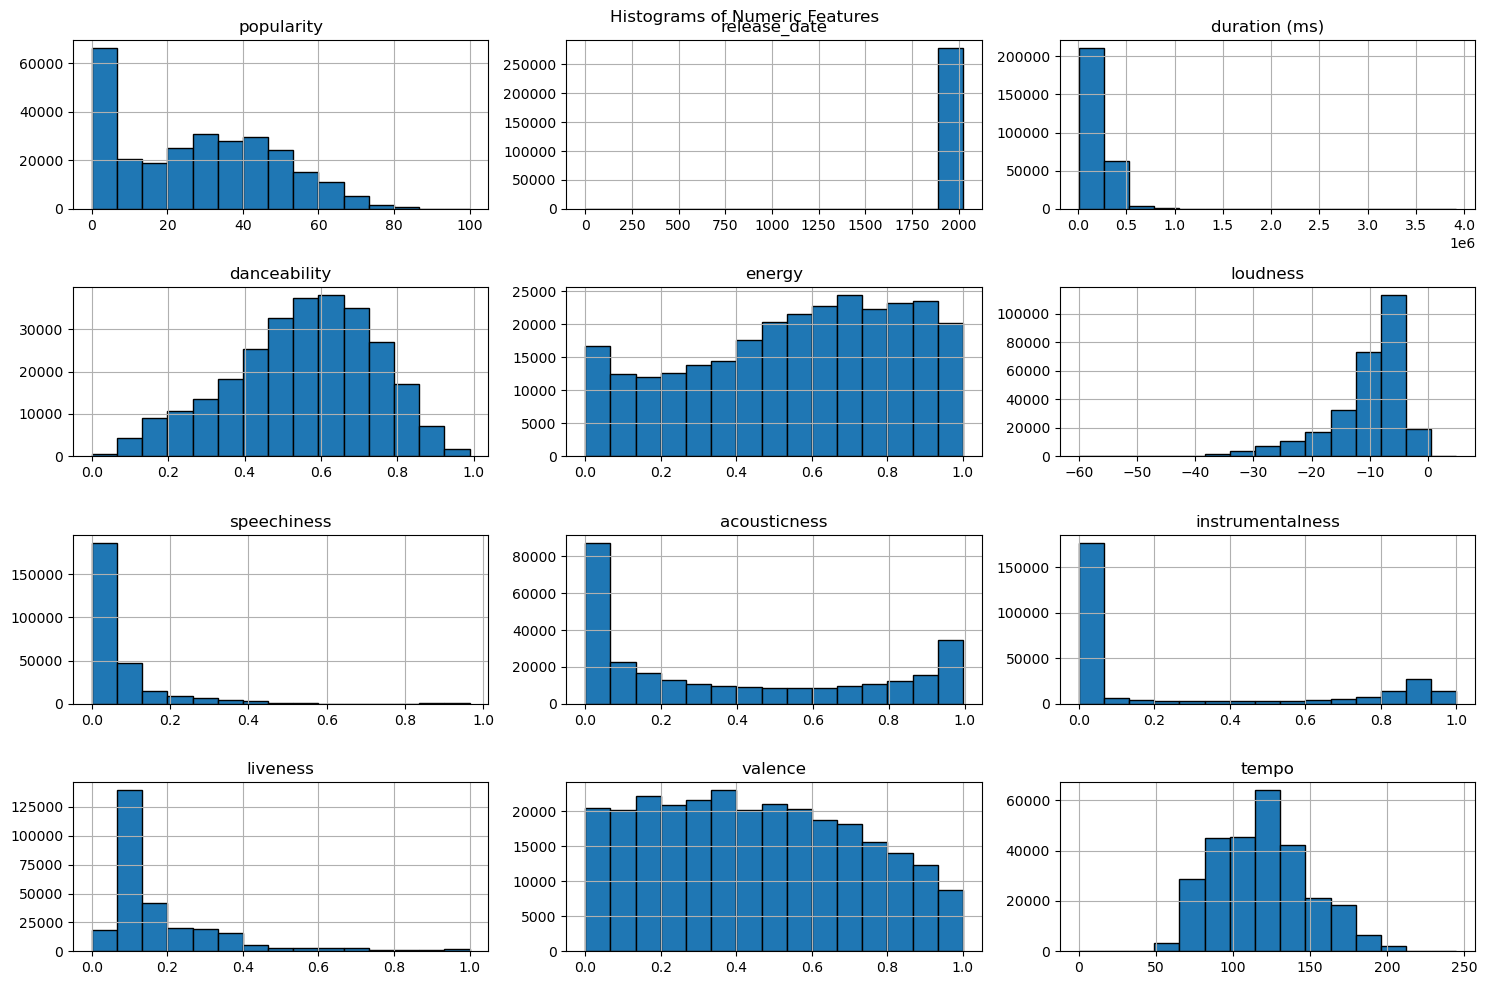

In [25]:
plot_data.plot_multiple_distributions(df_cleaned)

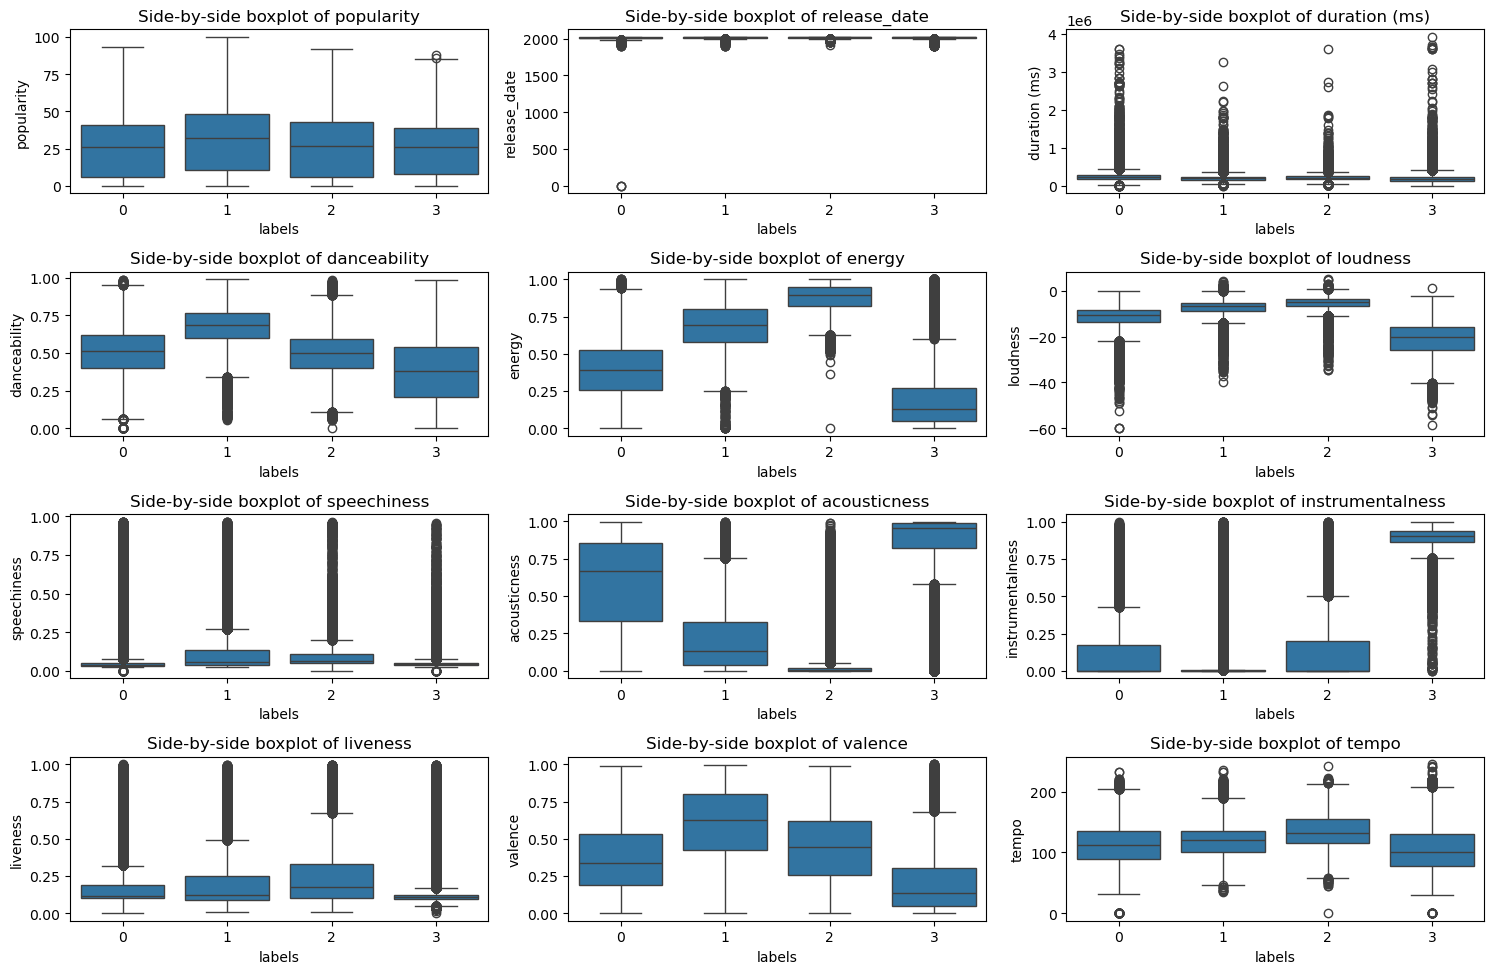

In [26]:
plot_data.plot_multiple_side_by_side_boxplots(df_cleaned)

In [27]:
def remove_outliers(df, target_col, cols_to_avoid=['popularity']):
    df = df.copy()
    # For each numeric column, calculate the IQR and remove outliers by class
    numeric_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)
    
    # Ensure the target column is excluded from outlier processing
    numeric_columns.remove(target_col)
    
    # Remove any columns in the cols_to_avoid list
    numeric_columns = [col for col in numeric_columns if col not in cols_to_avoid]
    
    # Group by the target column (class)
    def outlier_removal(group):
        for col in numeric_columns:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filter the group
            group = group[(group[col] >= lower_bound) & (group[col] <= upper_bound)]
        return group
    
    # Apply the outlier removal function to each group
    df = df.groupby(target_col).apply(outlier_removal).reset_index(drop=True)
    
    return df


/tmp/ipykernel_19267/2766705524.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(target_col).apply(outlier_removal).reset_index(drop=True)


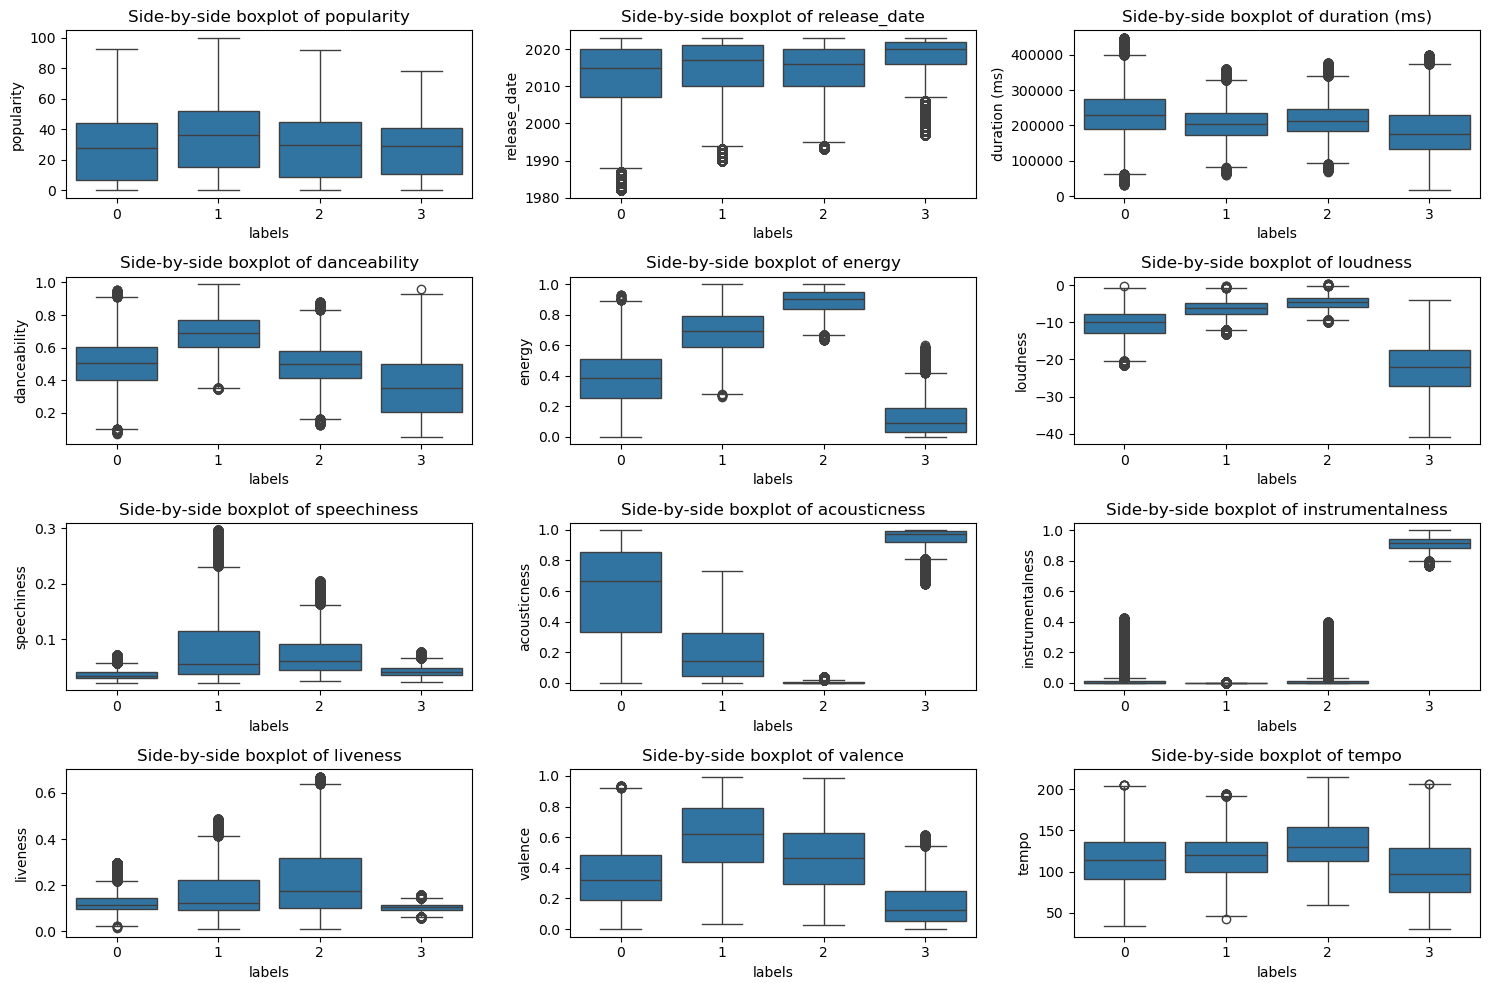

In [28]:
df_cleaned = remove_outliers(df_cleaned, target_col='labels')
plot_data.plot_multiple_side_by_side_boxplots(df_cleaned)

In [29]:
df_cleaned.head()

,uri,name,artists_names,popularity,release_date,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,spotify:track:78Sw5GDo6AlGwTwanjXbGh,Here With Me,d4vd,93,2022,242485.0,0.574,0.469,-8.209,0.0254,0.534,0.000092,0.1280,0.288,132.023,0
1,spotify:track:1Y3LN4zO1Edc2EluIoSPJN,Until I Found You (with Em Beihold) - Em Beiho...,Stephen Sanchez,92,2022,176440.0,0.551,0.550,-5.339,0.0286,0.777,0.000000,0.2020,0.342,101.190,0
2,spotify:track:5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,Arctic Monkeys,91,2013,183956.0,0.464,0.417,-9.345,0.0256,0.136,0.022000,0.0974,0.479,67.528,0
3,spotify:track:3JvKfv6T31zO0ini8iNItO,Another Love,Tom Odell,91,2013,244360.0,0.445,0.537,-8.532,0.0400,0.695,0.000017,0.0944,0.131,122.769,0
4,spotify:track:26b3oVLrRUaaybJulow9kz,People,Libianca,89,2022,184791.0,0.573,0.422,-7.621,0.0678,0.551,0.000013,0.1020,0.693,124.357,0


In [30]:
np.sort(df_cleaned.release_date.unique())

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [31]:
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146066 entries, 0 to 146065
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uri               146066 non-null  object 
 1   name              146066 non-null  object 
 2   artists_names     146066 non-null  object 
 3   popularity        146066 non-null  int64  
 4   release_date      146066 non-null  int64  
 5   duration (ms)     146066 non-null  float64
 6   danceability      146066 non-null  float64
 7   energy            146066 non-null  float64
 8   loudness          146066 non-null  float64
 9   speechiness       146066 non-null  float64
 10  acousticness      146066 non-null  float64
 11  instrumentalness  146066 non-null  float64
 12  liveness          146066 non-null  float64
 13  valence           146066 non-null  float64
 14  tempo             146066 non-null  float64
 15  labels            146066 non-null  int64  
dtypes: float64(10), int6

In [32]:
df_cleaned.to_csv('clean_data/spotify_songs_clean.csv', index=False)